# EDA Project: Medical Appointment No-Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Features are:
>> <b>PatientId</b>: the ID of the patient, mostly I will delete this column because we do not need it.
>> <br><b>AppointmentId</b>: the ID of the appointment, mostly I will delete this column because we do not need it.
>><br><b>Gender</b>: Male or Female.
>><br><b>ScheduledDay</b>: on what day the patient set up their appointment.
>><br><b>AppointmentDay</b>: it is the appointment day
>><br><b>Age</b>: How old is the patient.
>><br><b>Neighborhood</b>: Where the appointment takes place (because it is in Brazil, I don't think we can know the difference between each neighbour, so I might delete this column)
>><br><b>Scholarship</b>: True of false. This is a broad topic, you can read this article --> [Link](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
>><br><b>Hypertension</b>: True or False.
>><br><b>Diabetes</b>: True or false.
>><br><b>Alcoholism</b>: True or False.
>><br><b>Handicap</b>: True or False.
>><br><b>SMS_received</b>: 1 or more messages sent to the patient.
>><br><b>No-Show</b>: 1, who’s didn’t show. 0, who did show in his appointment.




### Question(s) for Analysis
>



In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
database = "EDA_pro.db"

conn = sqlite3.connect(database)

df = pd.read_sql_query("select * from noshowappointments", con=conn)

conn.close()

In [3]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
>first things first: I will remove some columns that we do not need them in my EDA.
><br>such as: <b>patient_id, appointment_id</b>
><br>I will remove <b>neighbourhood</b> because I do not know the difference between eatch neighbourhood.
 

In [5]:
df.drop(['patient_id', 'appointment_id', 'neighbourhood'], axis=1, inplace=True)

In [6]:
df.head(1)

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


In [7]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### minimum age is -1 which is not Realistic, so we should handle it

In [8]:
df = df[df['age']>=0]

In [9]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.isna().sum()

gender             0
scheduled_day      0
appointment_day    0
age                0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

#### Now, we should comnvert types of columns (scheduled_day, appointment_day) from a string to datatime type to perform some analysis on it.

In [11]:
df['scheduled_day']

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: scheduled_day, Length: 110526, dtype: object

In [12]:
df['scheduled_day'] = df['scheduled_day'].apply(lambda x: parser.parse(x))

In [13]:
df['scheduled_day']

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: scheduled_day, Length: 110526, dtype: datetime64[ns, tzutc()]

In [14]:
df['appointment_day'] = df['appointment_day'].apply(lambda x: parser.parse(x))

In [15]:
df['appointment_day']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: appointment_day, Length: 110526, dtype: datetime64[ns, tzutc()]

In [16]:
df.head(300)

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
295,M,2016-03-15 10:57:15+00:00,2016-04-29 00:00:00+00:00,54,0,1,1,0,0,0,No
296,F,2016-04-29 10:08:47+00:00,2016-04-29 00:00:00+00:00,83,0,0,0,0,0,0,No
297,F,2016-04-25 14:39:05+00:00,2016-04-29 00:00:00+00:00,16,0,0,0,0,0,1,No
298,F,2016-03-15 16:51:57+00:00,2016-04-29 00:00:00+00:00,22,0,0,0,0,0,0,Yes


In [17]:
df['scheduled_day'] = pd.to_datetime(df.scheduled_day).dt.tz_localize(None)
df['appointment_day'] = pd.to_datetime(df.appointment_day).dt.tz_localize(None)

In [18]:
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

In [19]:
df['scheduled_day']

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
                 ...        
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: scheduled_day, Length: 110526, dtype: datetime64[ns]

In [20]:
#here we see that in appointment_day column we dont have time, so we should deal with scheduled_day also
df['appointment_day']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: appointment_day, Length: 110526, dtype: datetime64[ns]

In [21]:
# since we dont have a time in appointment_day values, we will remove time from the values in scheduled day column
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110526 non-null  object        
 1   scheduled_day    110526 non-null  object        
 2   appointment_day  110526 non-null  datetime64[ns]
 3   age              110526 non-null  int64         
 4   scholarship      110526 non-null  int64         
 5   hypertension     110526 non-null  int64         
 6   diabetes         110526 non-null  int64         
 7   alcoholism       110526 non-null  int64         
 8   handicap         110526 non-null  int64         
 9   sms_received     110526 non-null  int64         
 10  no_show          110526 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 10.1+ MB


In [23]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)

In [24]:
df.head(5)

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No


In [25]:
df['diff_between_dates'] = df['appointment_day'] - df['scheduled_day'] 

In [26]:
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,diff_between_dates
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,0 days
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,0 days
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,0 days
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,0 days
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,0 days


In [27]:
df['diff_between_dates'].astype(str)

0          0 days
1          0 days
2          0 days
3          0 days
4          0 days
           ...   
110522    35 days
110523    35 days
110524    41 days
110525    41 days
110526    41 days
Name: diff_between_dates, Length: 110526, dtype: object

In [28]:
#df['diff_between_dates'].

## Exploratory Data Analysis


### From our data, what is the average of patient (show up, didn't show up)

In [29]:
df1 = df['no_show'].value_counts()

In [30]:
df1

No     88207
Yes    22319
Name: no_show, dtype: int64

In [31]:
df1 = df1.to_frame()

In [32]:
all_p = df['no_show'].count()

In [33]:
df1

,no_show
No,88207
Yes,22319


In [34]:
df1['mean']=df1['no_show']/all_p

In [35]:
df1

,no_show,mean
No,88207,0.798066
Yes,22319,0.201934


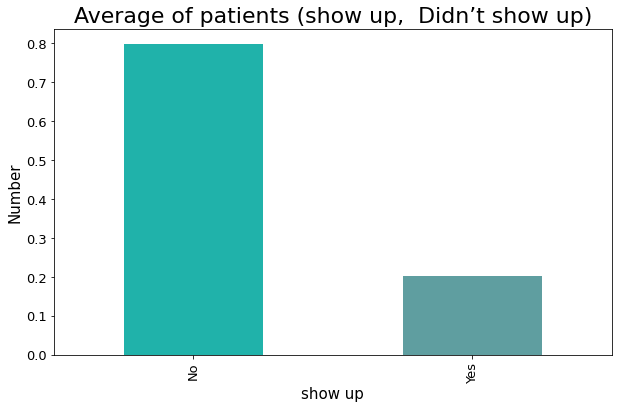

In [36]:
ax = df1['mean'].plot(kind='bar', figsize=(10,6), color=['lightseagreen', 'cadetblue'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Average of patients (show up,  Didn’t show up)", fontsize=22)
ax.set_ylabel("Number", fontsize=15);
ax.set_xlabel("show up", fontsize=15);
plt.show()

#### As we see, most of the patient show uo and there are 20% of patients didn’t show up in their appointment, now let’s dig more about them.

### Is there any connection between age and not shot up?

In [37]:
df2 = df.groupby('no_show')['age'].mean()

In [38]:
df2

no_show
No     37.790504
Yes    34.317667
Name: age, dtype: float64

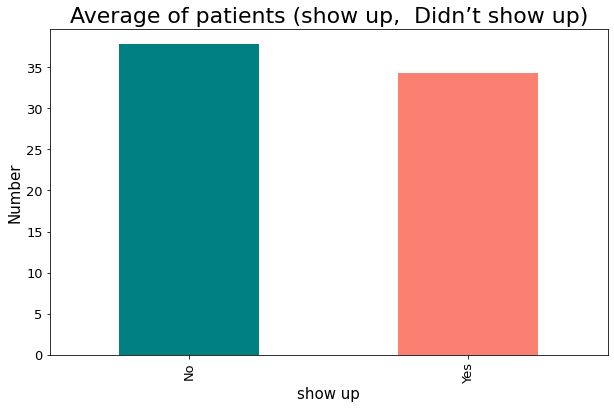

In [39]:
ax = df2.plot(kind='bar', figsize=(10,6), color=['teal', 'salmon'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Average of patients (show up,  Didn’t show up)", fontsize=22)
ax.set_ylabel("Number", fontsize=15);
ax.set_xlabel("show up", fontsize=15);
plt.show()

#### As we can see, the ones who shows in their appointment older (mean=37) than the ones they didn’t shows in their appointment (mean=34).
 
#### we can observe here that older people is most likley to attend the appointment.

### Is the patient with a scholarship have more probability to not show in the appointment?

In [40]:
df0 = df.groupby('no_show')['scholarship'].mean()

In [41]:
df0 = df0.to_frame()

In [42]:
# all_p: Number of all patients
df0['mean_patient'] = df1['no_show']/all_p

In [43]:
df0

,scholarship,mean_patient
no_show,,
No,0.093904,0.798066
Yes,0.115507,0.201934


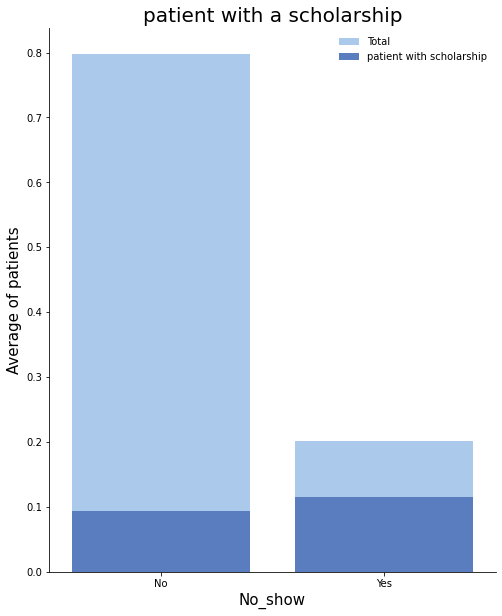

In [44]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total patients
sns.set_color_codes("pastel")
sns.barplot(x=['No', 'Yes'], y=df0.mean_patient, data=df0, label="Total", color="b")

# Plot the patients with scholarship
sns.set_color_codes("muted")
sns.barplot(x=['No', 'Yes'], y=df0.scholarship, data=df0, label="patient with scholarship", color="b")

# Add a legend and informative axis label
ax.legend(frameon=False);
ax.set_title('patient with a scholarship', fontsize=20)
ax.set_ylabel('Average of patients',fontsize=15)
ax.set_xlabel('No_show',fontsize=15)
sns.despine(right=True, top=True);

#### As we can see, no show up patient with a scholarship (mean=0.11) which is more than 50% of total no show up patients (mean=0.20)

### Is there any connection between not showing up in the appointment and the time between schedule day and appointment day?

In [ ]:
df_t = df.groupby('no_show')['diff_between_dates'].mean()
df_t=df_t.to_frame()
df_t

In [ ]:
sns.barplot(data=df_t, x=, y=df_t.diff_between_dates)